In [8]:
#This goes from size 4 to size 128 images
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [9]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [10]:
PATH = "/home/ubuntu/fastai/courses/dl1/data/statoil/"
%cd "/home/ubuntu/fastai/courses/dl1/data/statoil/"

/home/ubuntu/data/statoil


In [11]:
??tfms_from_model


In [12]:
#Load train and test data
train = pd.read_json("train.json")
test = pd.read_json("test.json")


In [13]:
%rm -r  "/home/ubuntu/fastai/courses/dl1/data/statoil/train/"
%rm -r  "/home/ubuntu/fastai/courses/dl1/data/statoil/valid/"
%rm -r  "/home/ubuntu/fastai/courses/dl1/data/statoil/test/"
%rm -r  "/home/ubuntu/fastai/courses/dl1/data/statoil/tmp/"


rm: cannot remove '/home/ubuntu/fastai/courses/dl1/data/statoil/train/': No such file or directory
rm: cannot remove '/home/ubuntu/fastai/courses/dl1/data/statoil/valid/': No such file or directory
rm: cannot remove '/home/ubuntu/fastai/courses/dl1/data/statoil/test/': No such file or directory
rm: cannot remove '/home/ubuntu/fastai/courses/dl1/data/statoil/tmp/': No such file or directory


In [14]:
def color_composite(data):
    rgb_arrays = []
    for i, row in data.iterrows():
        band_1 = np.array(row['band_1']).reshape(75, 75)
        band_2 = np.array(row['band_2']).reshape(75, 75)
        band_3 = (band_1 + band_2)/2

        r = (band_1 + abs(band_1.min())) / np.max((band_1 + abs(band_1.min())))
        g = (band_2 + abs(band_2.min())) / np.max((band_2 + abs(band_2.min())))
        b = (band_3 + abs(band_3.min())) / np.max((band_3 + abs(band_3.min())))

        rgb = np.dstack((r, g, b))
        rgb_arrays.append(rgb)
    return np.array(rgb_arrays)

In [15]:
X_train = color_composite(train)
X_test = color_composite(test)

In [16]:
%mkdir train
import sys
lenTrain = len(train)
print(lenTrain)
for i in range(0,lenTrain):
    isIceberg = (train.ix[i]['is_iceberg'])
    if(isIceberg == 1):scipy.misc.imsave('train/iceberg.'+str(i)+'.png', X_train[i])
    else:scipy.misc.imsave('train/ship.'+str(i)+'.png', X_train[i])


1604


/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [17]:
%mkdir valid
%cd $PATH/train
g = glob('*.png')
shuf = np.random.permutation(g)
for i in range(500): os.rename(shuf[i], PATH+'/valid/' + shuf[i])

/home/ubuntu/data/statoil/train


In [18]:
%cd $PATH/valid
%mkdir iceberg
%mkdir ship
%mv iceberg.*.png iceberg/
%mv ship.*.png ship/

/home/ubuntu/data/statoil/valid


In [19]:
%cd $PATH/train
%mkdir iceberg
%mkdir ship
%mv iceberg.*.png iceberg/
%mv ship.*.png ship/

/home/ubuntu/data/statoil/train


In [20]:
%cd $PATH
%mkdir test
import scipy.misc
lenTest = len(test)
print(lenTest)
for i in range(lenTest):
    scipy.misc.imsave('test/'+str(i)+'.png', X_test[i])


/home/ubuntu/data/statoil
8424


In [52]:
f_model = resnet18
bs = 32

In [53]:
def get_data(sz, bs):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.00)
    data = ImageClassifierData.from_paths(PATH, test_name = 'test', bs = bs,
                                          tfms = tfms)
    return data

In [54]:
sz=4


In [55]:
data = get_data(sz,bs)
learn = ConvLearner.pretrained(f_model, data)

A Jupyter Widget


 74%|███████▍  | 26/35 [00:02<00:00, 12.92it/s, loss=9.2] 

                                                         

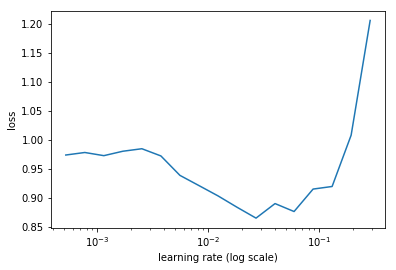

In [56]:
lrf=learn.lr_find()
learn.sched.plot()

In [57]:
lr = 0.009

In [58]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=3)

A Jupyter Widget


100%|██████████| 35/35 [00:02<00:00, 16.32it/s, loss=0.699]
                                                           [ 0.       0.35442  0.62928  0.62266]

 89%|████████▊ | 31/35 [00:02<00:00, 14.76it/s, loss=0.661]
                                                           [ 1.       0.50046  0.64768  0.66367]

100%|██████████| 35/35 [00:02<00:00, 16.88it/s, loss=0.629]
                                                           [ 2.       0.55329  0.72282  0.65781]



100%|██████████| 35/35 [00:02<00:00, 17.19it/s, loss=0.599]
                                                           [ 3.       0.56404  0.6898   0.64687]

 97%|█████████▋| 34/35 [00:02<00:00, 16.60it/s, loss=0.611]
                                                           [ 4.       0.59346  0.79181  0.65078]

 91%|█████████▏| 32/35 [00:02<00:00, 15.40it/s, loss=0.617]
                                                           [ 5.       0.60778  0.69396  0.65312]



 97%|█████████▋| 34/35 [00:02<00:00, 16.74it/s, loss=0.613]
                                                           [ 6.       0.60864  0.75615  0.62891]

100%|██████████| 35/35 [00:02<00:00, 16.84it/s, loss=0.621]
                                                           [ 7.       0.61921  0.73391  0.64805]

100%|██████████| 35/35 [00:02<00:00, 17.06it/s, loss=0.598]
                                                           [ 8.       0.59726  0.6543   0.65273]



 97%|█████████▋| 34/35 [00:02<00:00, 16.35it/s, loss=0.584]
                                                           [ 9.       0.584    0.68648  0.6625 ]

100%|██████████| 35/35 [00:02<00:00, 16.73it/s, loss=0.57]
                                                          [ 10.        0.56942   0.6465    0.67344]

100%|██████████| 35/35 [00:02<00:00, 16.98it/s, loss=0.57]
                                                          [ 11.        0.57028   0.65779   0.66836]

  0%|          | 0/35 [00:01<?, ?it/s, loss=0.571]


100%|██████████| 35/35 [00:02<00:00, 16.96it/s, loss=0.558]
                                                           [ 12.        0.55747   0.66035   0.66641]



In [59]:
lrs = np.array([lr/9,lr/3,lr])

In [60]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

A Jupyter Widget


 97%|█████████▋| 34/35 [00:04<00:00,  6.96it/s, loss=0.687]
                                                           [ 0.       0.34807  0.61561  0.62383]

100%|██████████| 35/35 [00:04<00:00,  7.04it/s, loss=0.683]
                                                           [ 1.       0.51658  0.67007  0.63867]

 29%|██▊       | 10/35 [00:02<00:05,  4.28it/s, loss=0.661]


100%|██████████| 35/35 [00:04<00:00,  7.32it/s, loss=0.646]
                                                           [ 2.       0.56879  0.83293  0.57461]

 97%|█████████▋| 34/35 [00:04<00:00,  6.80it/s, loss=0.657]
                                                           [ 3.       0.61833  0.78721  0.64844]

 60%|██████    | 21/35 [00:03<00:02,  5.75it/s, loss=0.649]


100%|██████████| 35/35 [00:04<00:00,  7.23it/s, loss=0.635]
                                                           [ 4.       0.61689  0.63212  0.675  ]

100%|██████████| 35/35 [00:04<00:00,  7.23it/s, loss=0.618]
                                                           [ 5.       0.60887  0.68932  0.6418 ]

 94%|█████████▍| 33/35 [00:04<00:00,  6.94it/s, loss=0.595]


100%|██████████| 35/35 [00:04<00:00,  7.16it/s, loss=0.593]
                                                           [ 6.       0.58923  0.67102  0.64375]



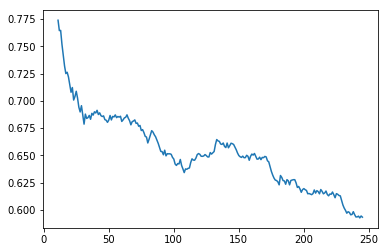

In [61]:
learn.sched.plot_loss()

In [62]:
sz=8

In [63]:
learn.set_data(get_data(sz,bs))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=3)


100%|██████████| 35/35 [00:02<00:00, 17.17it/s]

100%|██████████| 16/16 [00:01<00:00,  8.89it/s]

100%|██████████| 264/264 [00:05<00:00, 48.31it/s]

A Jupyter Widget


100%|██████████| 35/35 [00:02<00:00, 15.87it/s, loss=0.698]
                                                           [ 0.       0.35375  0.63656  0.6207 ]

100%|██████████| 35/35 [00:02<00:00, 16.00it/s, loss=0.692]
                                                           [ 1.       0.52379  0.95501  0.47773]

 97%|█████████▋| 34/35 [00:02<00:00, 15.50it/s, loss=0.694]
                                                           [ 2.       0.61039  0.61185  0.68047]

  0%|          | 0/35 [00:00<?, ?it/s]


 94%|█████████▍| 33/35 [00:02<00:00, 15.06it/s, loss=0.682]
                                                           [ 3.       0.64165  0.63047  0.66094]

 94%|█████████▍| 33/35 [00:02<00:00, 15.05it/s, loss=0.692]
                                                           [ 4.       0.67187  0.6233   0.68281]

 94%|█████████▍| 33/35 [00:02<00:00, 15.01it/s, loss=0.712]
                                                           [ 5.       0.7015   0.61655  0.62695]

  3%|▎         | 1/35 [00:01<00:48,  1.41s/it, loss=0.714]


 97%|█████████▋| 34/35 [00:02<00:00, 15.41it/s, loss=0.704]
                                                           [ 6.       0.6987   0.62491  0.64805]

100%|██████████| 35/35 [00:02<00:00, 15.91it/s, loss=0.744]
                                                           [ 7.       0.74091  0.60336  0.66406]

 97%|█████████▋| 34/35 [00:02<00:00, 15.47it/s, loss=0.72] 
                                                          [ 8.       0.71915  0.57957  0.68906]

  3%|▎         | 1/35 [00:01<00:51,  1.50s/it, loss=0.72]


100%|██████████| 35/35 [00:02<00:00, 15.75it/s, loss=0.682]
                                                           [ 9.       0.6817   0.58017  0.69297]

100%|██████████| 35/35 [00:02<00:00, 15.65it/s, loss=0.668]
                                                           [ 10.        0.66787   0.58517   0.68711]

100%|██████████| 35/35 [00:02<00:00, 15.63it/s, loss=0.653]
                                                           [ 11.        0.65285   0.59242   0.67539]

  3%|▎         | 1/35 [00:01<00:49,  1.45s/it, loss=0.655]


100%|██████████| 35/35 [00:02<00:00, 15.82it/s, loss=0.652]
                                                           [ 12.        0.65162   0.58947   0.67734]



In [64]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')


A Jupyter Widget


100%|██████████| 35/35 [00:04<00:00,  7.04it/s, loss=0.698]
                                                           [ 0.       0.35382  0.64999  0.63711]

 97%|█████████▋| 34/35 [00:04<00:00,  6.81it/s, loss=0.672]
                                                           [ 1.       0.5089   0.7491   0.65352]

 26%|██▌       | 9/35 [00:02<00:07,  3.60it/s, loss=0.665]


100%|██████████| 35/35 [00:04<00:00,  7.02it/s, loss=0.655]
                                                           [ 2.       0.57641  0.67022  0.65664]

100%|██████████| 35/35 [00:05<00:00,  6.94it/s, loss=0.633]
                                                           [ 3.       0.59564  0.66174  0.67852]

 51%|█████▏    | 18/35 [00:04<00:04,  4.17it/s, loss=0.626]


100%|██████████| 35/35 [00:05<00:00,  6.01it/s, loss=0.598]
                                                           [ 4.       0.58071  0.68838  0.66094]

100%|██████████| 35/35 [00:05<00:00,  6.80it/s, loss=0.573]
                                                           [ 5.       0.56454  0.659    0.69336]

 86%|████████▌ | 30/35 [00:04<00:00,  6.43it/s, loss=0.553]


 97%|█████████▋| 34/35 [00:05<00:00,  6.68it/s, loss=0.555]
                                                           [ 6.       0.55065  0.65543  0.6875 ]



In [65]:
##
sz=16

In [66]:
learn.set_data(get_data(sz,bs))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=3)


100%|██████████| 16/16 [00:01<00:00,  8.63it/s]

100%|██████████| 264/264 [00:05<00:00, 48.30it/s]

A Jupyter Widget


 89%|████████▊ | 31/35 [00:02<00:00, 14.02it/s, loss=0.695]
                                                           [ 0.       0.35209  0.69653  0.62852]

 89%|████████▊ | 31/35 [00:02<00:00, 14.10it/s, loss=0.718]
                                                           [ 1.       0.54366  0.65069  0.64375]

100%|██████████| 35/35 [00:02<00:00, 15.60it/s, loss=0.692]
                                                           [ 2.       0.60937  0.65447  0.65742]



 86%|████████▌ | 30/35 [00:02<00:00, 13.45it/s, loss=0.681]
                                                           [ 3.       0.64055  0.72205  0.60352]

 89%|████████▊ | 31/35 [00:02<00:00, 13.90it/s, loss=0.699]
                                                           [ 4.       0.67835  0.7417   0.62383]

100%|██████████| 35/35 [00:02<00:00, 15.83it/s, loss=0.729]
                                                           [ 5.       0.71806  0.93486  0.57148]

  0%|          | 0/35 [00:01<?, ?it/s, loss=0.727]


100%|██████████| 35/35 [00:02<00:00, 15.82it/s, loss=0.72]
                                                          [ 6.       0.71502  0.86099  0.62227]

 91%|█████████▏| 32/35 [00:02<00:00, 14.34it/s, loss=0.702]
                                                           [ 7.       0.69963  0.79875  0.58516]

 94%|█████████▍| 33/35 [00:02<00:00, 14.86it/s, loss=0.68] 
                                                          [ 8.       0.67923  0.77075  0.6543 ]

  0%|          | 0/35 [00:01<?, ?it/s, loss=0.679]


100%|██████████| 35/35 [00:02<00:00, 15.70it/s, loss=0.663]
                                                           [ 9.       0.66221  0.68486  0.64258]

 97%|█████████▋| 34/35 [00:02<00:00, 15.38it/s, loss=0.647]
                                                           [ 10.        0.64682   0.6986    0.6457 ]

 89%|████████▊ | 31/35 [00:02<00:00, 14.06it/s, loss=0.625]
                                                           [ 11.        0.6245    0.65103   0.63867]



 97%|█████████▋| 34/35 [00:02<00:00, 15.23it/s, loss=0.624]
                                                           [ 12.        0.62387   0.66083   0.6457 ]



In [67]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')


A Jupyter Widget


100%|██████████| 35/35 [00:05<00:00,  6.81it/s, loss=0.604]
                                                           [ 0.       0.30631  0.57813  0.69531]

 97%|█████████▋| 34/35 [00:05<00:00,  6.71it/s, loss=0.571]
                                                           [ 1.       0.43203  0.60737  0.68398]

 17%|█▋        | 6/35 [00:02<00:10,  2.67it/s, loss=0.563]


100%|██████████| 35/35 [00:04<00:00,  7.07it/s, loss=0.506]
                                                           [ 2.       0.445    0.53922  0.69922]

 97%|█████████▋| 34/35 [00:05<00:00,  6.63it/s, loss=0.507]
                                                           [ 3.       0.47716  0.51277  0.74414]

 46%|████▌     | 16/35 [00:03<00:03,  4.82it/s, loss=0.497]


 97%|█████████▋| 34/35 [00:05<00:00,  6.62it/s, loss=0.494]
                                                           [ 4.       0.47925  0.53376  0.73672]

 97%|█████████▋| 34/35 [00:05<00:00,  6.79it/s, loss=0.459]
                                                           [ 5.       0.45214  0.4911   0.75586]

 71%|███████▏  | 25/35 [00:04<00:01,  5.87it/s, loss=0.417]


100%|██████████| 35/35 [00:05<00:00,  6.75it/s, loss=0.417]
                                                           [ 6.       0.41374  0.48186  0.76172]



In [68]:
sz=32

In [69]:
learn.set_data(get_data(sz,bs))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=3)


100%|██████████| 35/35 [00:02<00:00, 15.66it/s]

100%|██████████| 264/264 [00:05<00:00, 45.89it/s]

A Jupyter Widget


100%|██████████| 35/35 [00:02<00:00, 15.55it/s, loss=0.732]
                                                           [ 0.       0.37098  0.59775  0.66641]

100%|██████████| 35/35 [00:02<00:00, 15.59it/s, loss=0.706]
                                                           [ 1.       0.53446  0.63007  0.68164]

100%|██████████| 35/35 [00:02<00:00, 15.50it/s, loss=0.668]


                                                           [ 2.       0.5878   0.60982  0.67422]

 86%|████████▌ | 30/35 [00:02<00:00, 13.23it/s, loss=0.632]
                                                           [ 3.       0.59421  0.58441  0.6957 ]

 91%|█████████▏| 32/35 [00:02<00:00, 14.01it/s, loss=0.645]
                                                           [ 4.       0.62624  0.61421  0.66641]

 97%|█████████▋| 34/35 [00:02<00:00, 14.83it/s, loss=0.659]
                                                           [ 5.       0.64924  0.69656  0.64453]



100%|██████████| 35/35 [00:02<00:00, 15.47it/s, loss=0.639]
                                                           [ 6.       0.63442  0.62045  0.67305]

 94%|█████████▍| 33/35 [00:02<00:00, 14.58it/s, loss=0.621]
                                                           [ 7.       0.61914  0.59792  0.67773]

100%|██████████| 35/35 [00:02<00:00, 15.52it/s, loss=0.616]


                                                           [ 8.       0.61534  0.65722  0.66133]

100%|██████████| 35/35 [00:02<00:00, 15.36it/s, loss=0.596]
                                                           [ 9.       0.59511  0.60898  0.68203]

 91%|█████████▏| 32/35 [00:02<00:00, 14.04it/s, loss=0.586]
                                                           [ 10.        0.58589   0.59402   0.69258]

 77%|███████▋  | 27/35 [00:02<00:00, 12.28it/s, loss=0.564]


100%|██████████| 35/35 [00:02<00:00, 15.29it/s, loss=0.564]
                                                           [ 11.        0.56339   0.58431   0.7082 ]

 97%|█████████▋| 34/35 [00:02<00:00, 15.00it/s, loss=0.551]
                                                           [ 12.        0.551     0.58219   0.71016]



In [70]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

A Jupyter Widget


100%|██████████| 35/35 [00:05<00:00,  6.74it/s, loss=0.513]
                                                           [ 0.       0.25997  0.53995  0.73789]

 83%|████████▎ | 29/35 [00:04<00:00,  6.20it/s, loss=0.463]


100%|██████████| 35/35 [00:05<00:00,  6.58it/s, loss=0.454]
                                                           [ 1.       0.34393  0.58406  0.71055]

100%|██████████| 35/35 [00:05<00:00,  6.69it/s, loss=0.416]
                                                           [ 2.       0.36579  0.56906  0.74648]

 63%|██████▎   | 22/35 [00:03<00:02,  5.65it/s, loss=0.402]


100%|██████████| 35/35 [00:05<00:00,  6.68it/s, loss=0.402]
                                                           [ 3.       0.37834  0.53592  0.78516]

100%|██████████| 35/35 [00:05<00:00,  6.79it/s, loss=0.388]
                                                           [ 4.       0.37683  0.45927  0.78633]

 43%|████▎     | 15/35 [00:03<00:04,  4.79it/s, loss=0.372]


100%|██████████| 35/35 [00:05<00:00,  6.74it/s, loss=0.375]
                                                           [ 5.       0.36924  0.51384  0.76875]

100%|██████████| 35/35 [00:05<00:00,  6.75it/s, loss=0.339]
                                                           [ 6.       0.33668  0.45443  0.79922]



In [71]:
sz=64

In [72]:
learn.set_data(get_data(sz,bs))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=3)


100%|██████████| 35/35 [00:02<00:00, 13.80it/s]

100%|██████████| 16/16 [00:01<00:00,  8.01it/s]

100%|██████████| 264/264 [00:07<00:00, 34.97it/s]


A Jupyter Widget


100%|██████████| 35/35 [00:02<00:00, 13.61it/s, loss=0.571]
                                                           [ 0.       0.28957  0.56102  0.7    ]

 97%|█████████▋| 34/35 [00:02<00:00, 13.36it/s, loss=0.544]
                                                           [ 1.       0.41207  0.57859  0.69023]

 83%|████████▎ | 29/35 [00:02<00:00, 12.21it/s, loss=0.531]


100%|██████████| 35/35 [00:02<00:00, 13.78it/s, loss=0.525]
                                                           [ 2.       0.46216  0.59625  0.69492]

 97%|█████████▋| 34/35 [00:02<00:00, 13.21it/s, loss=0.508]
                                                           [ 3.       0.47824  0.59218  0.69688]

 91%|█████████▏| 32/35 [00:02<00:00, 12.19it/s, loss=0.497]
                                                           [ 4.       0.48259  0.60656  0.69883]

 60%|██████    | 21/35 [00:02<00:01,  8.77it/s, loss=0.505]


 94%|█████████▍| 33/35 [00:02<00:00, 12.51it/s, loss=0.514]
                                                           [ 5.       0.50687  0.63362  0.70469]

100%|██████████| 35/35 [00:02<00:00, 13.81it/s, loss=0.512]
                                                           [ 6.       0.50826  0.56749  0.72031]

 91%|█████████▏| 32/35 [00:02<00:00, 12.36it/s, loss=0.509]
                                                           [ 7.       0.50747  0.56471  0.73203]

 43%|████▎     | 15/35 [00:02<00:03,  6.64it/s, loss=0.495]


 94%|█████████▍| 33/35 [00:02<00:00, 12.76it/s, loss=0.493]
                                                           [ 8.       0.49172  0.559    0.73203]

 94%|█████████▍| 33/35 [00:02<00:00, 12.85it/s, loss=0.483]
                                                           [ 9.       0.48272  0.5939   0.72031]

100%|██████████| 35/35 [00:02<00:00, 13.57it/s, loss=0.477]
                                                           [ 10.        0.47679   0.55045   0.73398]

 31%|███▏      | 11/35 [00:02<00:04,  5.09it/s, loss=0.479]


100%|██████████| 35/35 [00:02<00:00, 13.51it/s, loss=0.475]
                                                           [ 11.        0.47521   0.55298   0.72227]

 97%|█████████▋| 34/35 [00:02<00:00, 13.16it/s, loss=0.48] 
                                                          [ 12.        0.47978   0.57158   0.72031]



In [73]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

A Jupyter Widget


100%|██████████| 35/35 [00:05<00:00,  6.16it/s, loss=0.462]
                                                           [ 0.       0.23407  0.61165  0.75313]

 83%|████████▎ | 29/35 [00:05<00:01,  5.74it/s, loss=0.419]


100%|██████████| 35/35 [00:05<00:00,  6.05it/s, loss=0.417]
                                                           [ 1.       0.31563  0.46095  0.7957 ]

100%|██████████| 35/35 [00:05<00:00,  6.12it/s, loss=0.37]
                                                          [ 2.       0.32561  0.43602  0.79961]

 63%|██████▎   | 22/35 [00:04<00:02,  5.06it/s, loss=0.368]


100%|██████████| 35/35 [00:05<00:00,  5.94it/s, loss=0.366]
                                                           [ 3.       0.34474  0.43317  0.80977]

100%|██████████| 35/35 [00:05<00:00,  6.09it/s, loss=0.352]
                                                           [ 4.       0.34146  0.37644  0.82188]

 43%|████▎     | 15/35 [00:03<00:04,  4.49it/s, loss=0.343]


100%|██████████| 35/35 [00:05<00:00,  6.14it/s, loss=0.335]
                                                           [ 5.       0.3303   0.50175  0.78789]

100%|██████████| 35/35 [00:05<00:00,  5.97it/s, loss=0.306]
                                                           [ 6.       0.30386  0.40524  0.80781]



In [74]:
sz=75

In [75]:
learn.set_data(get_data(sz,bs))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=3)


100%|██████████| 264/264 [00:08<00:00, 30.67it/s]

A Jupyter Widget


100%|██████████| 35/35 [00:02<00:00, 12.67it/s, loss=0.387]
                                                           [ 0.       0.19634  0.45145  0.76992]

 97%|█████████▋| 34/35 [00:02<00:00, 12.22it/s, loss=0.382]
                                                           [ 1.       0.28892  0.43881  0.78047]

 69%|██████▊   | 24/35 [00:02<00:01,  9.46it/s, loss=0.368]


 97%|█████████▋| 34/35 [00:02<00:00, 12.17it/s, loss=0.354]
                                                           [ 2.       0.31177  0.43609  0.78867]

 97%|█████████▋| 34/35 [00:02<00:00, 12.31it/s, loss=0.353]
                                                           [ 3.       0.33182  0.43288  0.79961]

100%|██████████| 35/35 [00:02<00:00, 12.42it/s, loss=0.366]
                                                           [ 4.       0.35496  0.43268  0.79336]

 49%|████▊     | 17/35 [00:02<00:02,  7.21it/s, loss=0.364]


 91%|█████████▏| 32/35 [00:02<00:00, 11.44it/s, loss=0.368]
                                                           [ 5.       0.363    0.40993  0.8043 ]

100%|██████████| 35/35 [00:02<00:00, 12.85it/s, loss=0.366]
                                                           [ 6.       0.3637   0.42247  0.80391]

100%|██████████| 35/35 [00:02<00:00, 12.36it/s, loss=0.361]
                                                           [ 7.       0.35961  0.42508  0.79453]

 29%|██▊       | 10/35 [00:02<00:05,  4.55it/s, loss=0.347]


100%|██████████| 35/35 [00:02<00:00, 12.46it/s, loss=0.359]
                                                           [ 8.       0.35819  0.4099   0.80273]

 97%|█████████▋| 34/35 [00:02<00:00, 12.09it/s, loss=0.351]
                                                           [ 9.       0.35047  0.4353   0.79648]

 91%|█████████▏| 32/35 [00:02<00:00, 11.31it/s, loss=0.347]
                                                           [ 10.        0.34676   0.40199   0.80508]

 14%|█▍        | 5/35 [00:02<00:12,  2.46it/s, loss=0.34]


 94%|█████████▍| 33/35 [00:02<00:00, 11.65it/s, loss=0.333]
                                                           [ 11.        0.33272   0.42104   0.8043 ]

100%|██████████| 35/35 [00:02<00:00, 12.59it/s, loss=0.329]
                                                           [ 12.        0.3291    0.41106   0.8043 ]



In [76]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

A Jupyter Widget


100%|██████████| 35/35 [00:06<00:00,  5.73it/s, loss=0.352]
                                                           [ 0.       0.17852  0.44266  0.77969]

 83%|████████▎ | 29/35 [00:05<00:01,  5.45it/s, loss=0.365]


100%|██████████| 35/35 [00:06<00:00,  5.75it/s, loss=0.347]
                                                           [ 1.       0.26277  0.37     0.81133]

100%|██████████| 35/35 [00:06<00:00,  5.78it/s, loss=0.333]
                                                           [ 2.       0.29271  0.37945  0.81133]

 63%|██████▎   | 22/35 [00:04<00:02,  4.98it/s, loss=0.298]


100%|██████████| 35/35 [00:06<00:00,  5.77it/s, loss=0.316]
                                                           [ 3.       0.29773  0.36201  0.82422]

100%|██████████| 35/35 [00:06<00:00,  5.78it/s, loss=0.305]
                                                           [ 4.       0.29596  0.28524  0.8707 ]

 43%|████▎     | 15/35 [00:03<00:04,  4.20it/s, loss=0.288]


100%|██████████| 35/35 [00:06<00:00,  5.76it/s, loss=0.272]
                                                           [ 5.       0.26804  0.31773  0.83945]

100%|██████████| 35/35 [00:06<00:00,  5.80it/s, loss=0.259]
                                                           [ 6.       0.25716  0.32947  0.84141]



In [77]:
from sklearn import metrics

log_preds,y = learn.TTA()
probs = np.exp(log_preds)
accuracy(log_preds,y), metrics.log_loss(y, probs)


(0.86799999999999999, 0.27716568518893292)

In [41]:
'''
#for file submission
#Actual test files are used for submission
test_preds = learn.TTA(is_test = True)
submission = pd.DataFrame()
submission['id'] = test['id']
submission['is_iceberg'] = pd.DataFrame({'is_iceberg':list(np.exp(test_preds[0][:][:,0]))})
#print(test_preds[:,0])
#submission['is_iceberg'] = pd.DataFrame({'is_iceberg':list(np.exp(test_preds[0][:,0]))})
submission.to_csv('sub_10.csv', index=False)
'''

In [79]:
test = pd.read_json(f'{PATH}test.json')
test_preds = np.exp(learn.TTA(is_test=True)[0])[:, 0]
test_idxs = [i.split('.png')[0].split('/')[-1] for i in data.test_dl.dataset.fnames]
test_ids_json = test['id']
test_ids = []
for i in test_idxs:
    test_ids.append(test_ids_json[int(i)])
test_set = pd.read_csv(f'{PATH}sample_submission.csv')
test_set['id'] = test_ids
test_set['is_iceberg'] = test_preds

In [80]:
test_set.to_csv("sub13.csv")